# 전개 방향

- 개별 알고리즘 -> 탐색 처리 -> 그래픽스 -> 게임 AI 구현 -> 게임 구현 완료


AI
- 약 AI (현재~)
  - 하나의 업무만 잘한다
- 강 AI (2040 도래)
  - 인지능력이 사람에 수준으로 도달하는 
  - 여러개를 잘하는 AI
- 초 AI (2060 도래)
  - 인간의 인지 능력을 초월한 수준
  - 인간이 AI를 이해하지 못하는 단계

# 다중 슬롯 머신

- 알고리즘
  - UCB1
  - ε-greedy (엡실론-greedy)

# 미로 게임

- 알고리즘
  - 정책 경사법
  - Sarsa
  - Q Learning

# 카트-풀 게임

- DQN

# 다중 슬롯 머신(Slot Machine) 구현

- 스타일을 익힌다
- 강화학습의 많은 요소들은 생략되어 있는 간단한 구조
- 전체적인 절차(플로우, 흐름)을 이해할 수 있다

## 게임 *환경*

- 슬롯머신의 팔(Arm)은 여러개 존재할수 있다
- 각 Arm을 선택할때 보상 Reward가 나올 확율은 정해졌다
  - 1번 arm은 10%
  - 2번 arm은 50%
  - 3번 arm은 90% ,...
- 게임을 시작할때 각 팔에 대한 확률은 모른다
- reward값은 1.0 아니면 0.0
  - 보상간의 차이는 없고, 단지 보상을 받는가 못받는가 만 신경쓰면 된다

## 게임의 *목적*

- 제한된 횟수에서 최대의 보상을 받는다
- 어떤 순서로 arm을 선택해야 하는가
- 어떤 arm을 당겨야 가장 많은 돈을 벌것인가?(단, 보상값들이 달라졌을대 해당)

## 에이전트 *행동*

- 여러 슬롯중 한개를 선택
- 1개를 당기면 -> 행동 -> 한판이 종료 -> 1 에피소드 종료
- 상태가 없다, 변화 없다

|강화 학습 요소|다중 슬롯머신상의 내용|
|:--:|:--:|
|에이전트|슬롯 머신을 내리는 사람|
|환경|다중 슬롯 머신|
|목적|많은 보상을 획득, 제한된 횟수 내에서|
|행동|여러개의 arm중 한개를 선택|
|에피소드|1회의 행동|
|상태|없음|
|보상|보상은 모두 동일하므로, +1.0(설정)|
|수익|보상의 총합(즉시보상+지연보상)|
|학습방법|UCB1, ε-greedy (엡실론-greedy)|
|파라미터변경주기(정책결정맥락)|1회의 행동 종료후|
|정책|하위에 별로로 기술|

### 정책에 대한 정리
- 슬롯머신의 Arm을 제한된 횟수내에 선택할수 있다(10회, 100회, 1000회)
- 탐색 : Arm별로 보상을 받을 확률을 모른다. 최초의 전략은 정보수집을 하기 위해 램덤하게 선택 
- 이용 : 정보 수집을 수행한 후, 이 정보를 기반으로 보상이 가장 높다고 판단되는 Arm을 선택
- 탐색과 이용에 대한 트레이드 오프 문제가 발생 => 균형이 필요(조화가 필요)
- 정보수집을 위해서 탐색만 수행하면, 모든 팔에 대한 보상 정보를 알게 되지만, 제한된 횟수라는 환경안에서 보상이 가장 높은 팔(확률이 가장 높은 팔)만 선택하는 것보다 수익이 적게 된다
- 반대시점, 현 시점에서 가장 높은 팔만 선택한다면, 더 많은 보상을 지급하는 팔을 선택하지 못하는 경우도 발생한다

In [1]:
# 구조
'''
- SlotMachineGame
  L SlotArm Class
  L GameEngine Class
    L EpsilonGreedyEngine Class
    L UCB1Engine Class
  L GameSimulator Class or function
'''

'\n- SlotMachineGame\n  L SlotArm Class\n  L GameEngine Class\n    L EpsilonGreedyEngine Class\n    L UCB1Engine Class\n  L GameSimulator Class or function\n'

In [0]:
# 필요 패키지
import numpy as np
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## SlotArm Class

In [0]:
# Slot Machine Arm class
class SlotArm():  
  # 초기화 -> 확률값 초기화(외부에서 주입)
  # p:객체를 만들때 주어지는 확률값
  def __init__(self, p):
    # 맴버 변수 self.p가 만들어지고, 외부에서 입력된 p로 인해 값이 초기화
    self.p = p 
  # 팔 선택시 보상 지급 처리 -> 세팅된 확률보다 랜덤 값이 작으면 -> 1.0
  # 아니면 0.0
  def draw(self):
    # 랜덤 값 : 0 ~ 1
    if self.p > random.random() :
      return 1.0
    else:
      return 0.0
  pass

In [4]:
# 랜덤값의 범위 확인
print( [ random.random() for n in range(10)] )

[0.0661879464350621, 0.6189525709469669, 0.19775511963924475, 0.7771671719838937, 0.842570196157343, 0.5123537329912506, 0.5785934449364717, 0.06105121508912936, 0.8422925569333037, 0.14215602272386663]


## GameEngine Class

- 알고리즘 2개에 대한 표준 인터페이스 제공

In [0]:
# 맴버변수의 파라미터들은 구현하면서 설정
# 알고리즘 검토후 필요변수 확인후 조정
class GameEngine():
  # 생성자
  # 알고리즘에 필요한 값 초기화  
  def initialize(self):
    pass
  # Arm 선택
  def select_arm(self):
    pass
  # 1 action이 완료된후 정책을 조정->파라미터 조정
  def valueUpdate(self):
    pass
  # 알고리즘 이름 출력
  def getName(self):
    pass

## ε-greedy 알고리즘

- 확률 ε(0~1)으로 랜던하게 행동을 선택
  - arm을 선택하는 행위
- 확률 1-ε는 현재 가치가 가장 높은 팔을 선택
- 이런 확률값중 가장 좋은 성능을 내는 값 0.1인 경우가 많다
- 0 -ε : 탐색, ε - 1 : 이용을 이용하였다


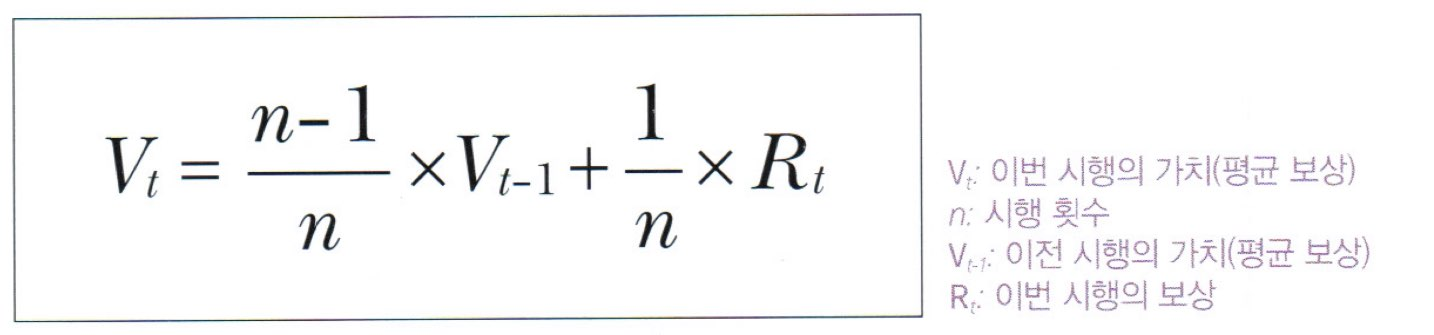

In [6]:
# ε-greedy.jpeg
from IPython.display import Image
Image( '/content/drive/My Drive/Colab Notebooks/2기/dl_data/ε-greedy.jpeg' )
# 현재 행동후 현재의 가치(평균보장)=(처음부터이전시도까지의수행양)*이전번가치 
#                         + (1/전체시도횟수)*현재받은보상

In [0]:
# 클레스로 구현
class EpsilonGreedyEngine(GameEngine):
  # 해당 알고리즘에서 팔 선택시 
  # 랜덤 or 이미 선택해본 팔중에 가치가 높은팔을 선택할것이니 그것을 
  # 결정하는 기준값, 통상 0.1이 가장 좋은 성능을 냈다
  def __init__(self, epsilon=0.1):
    self.epsilon = epsilon   # 탐색하는 확률
    pass
  # 경험을 들고 잇어야 하므로, 시도, 가치(보상)
  # n_arms:arm의 개수
  def initialize(self, n_arms):
    self.n = np.zeros(n_arms) # 각 팔의 시행횟수 [0,0,0]
    self.v = np.zeros(n_arms) # 각 팔의 가치     [0,0,0]
    pass
  # Arm을 선택  
  def select_arm(self):
    # 탐색
    if self.epsilon > random.random(): # 0.1보다 난수값이 작으면
      # 랜덤하게 팔을 선택
      # 0<= ~ < len(self.n) => 0<= x < 3 => 0, 1, 2중에 하나
      return np.random.randint(0, len(self.n) )
    else: # 이용
      # 가치가 높은 팔의 인덱스를 구해서 리턴-> 팔번호 : 0, 1, 2 중에 하나
      return np.argmax( self.v )
    pass  
  def valueUpdate(self, choice_arm, reward):
    # 1. 이번 에피소드에 선택한 arm의 수행 횟수를 증가
    self.n[ choice_arm ] += 1

    # 2. 이번 에피소드에 선택한 arm의 가치를 증가
    # (n-1)/n*Vt-1 + (1/n)*Rt
    n = self.n[ choice_arm ]
    # 직전 가치
    v = self.v[ choice_arm ]

    self.v[ choice_arm ] = ((n-1)/n)*v + (1/n)*reward
    pass
  def getName(self):
    return 'ε-greedy 알고리즘 이용'

## UCB1 알고리즘

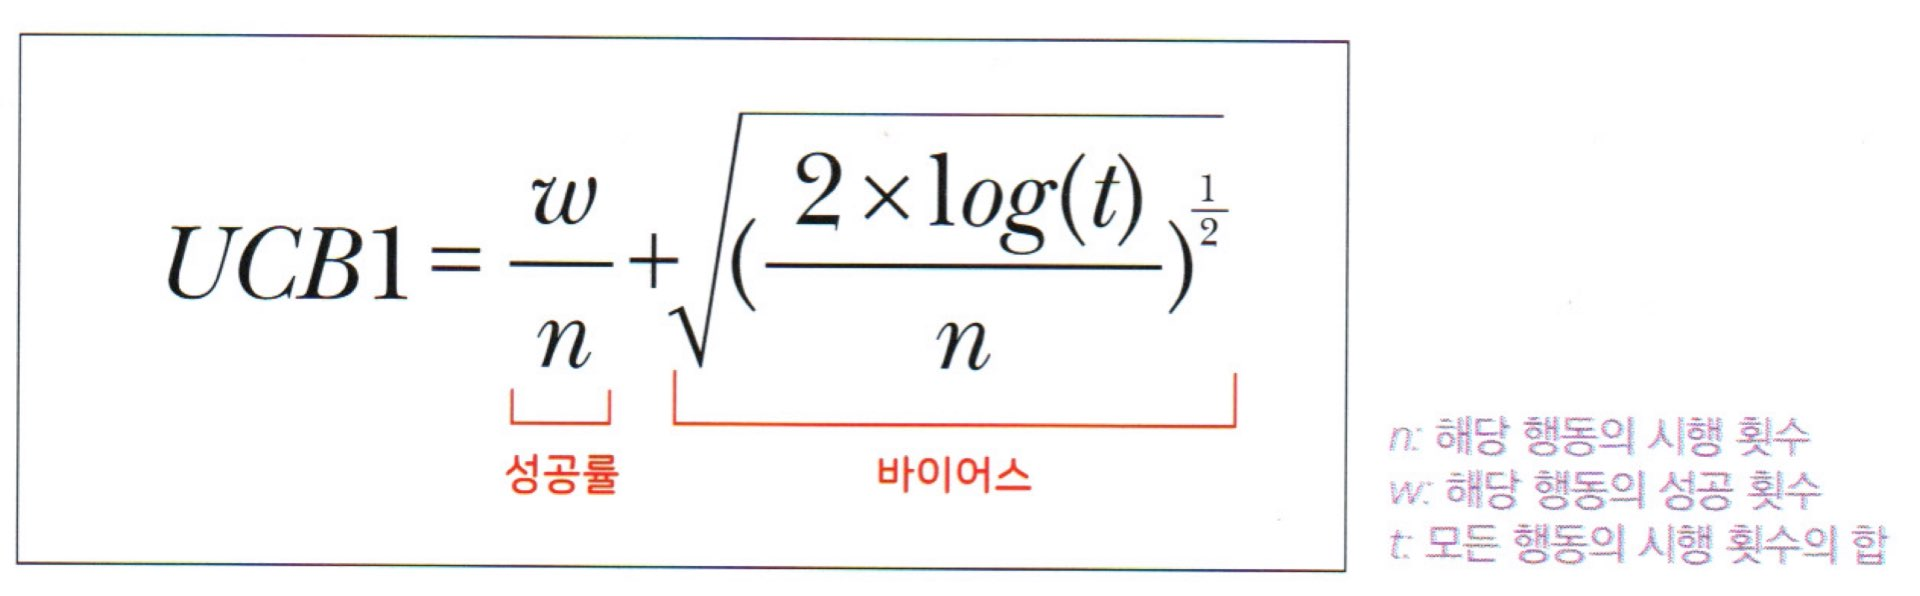

In [39]:
Image( '/content/drive/My Drive/Colab Notebooks/2기/dl_data/UCB1.jpeg', width=400 )

- 절차
  - 1. 선택한 팔의 시행 횟수 +1
  - 2. 성공시(보상을 받으면), 선택한 팔의 성공 횟수 +1
  - 3. 시행 횟수가 0인 팔이 존재하는 경우, 가치를 갱신하지 않는다 => 0으로 나눌수가 없어서
  - 4. 시행 횟수가 모두 0이상이면, 팔의 가치에 대해서 탐색과 이용에 대한 균형을 잡는다는 대전에 하에, 모든 팔의 가치를 갱신한다
  - 모든 팔을 한번 이상 사용할때까지는 가치 갱신을 하지 않는다 => 탐색
  - 모든 팔을 최소 1회 이상 사용해 봤다면, 전체 arm에대 가치 갱신을 시도한다

In [0]:
class UCB1Engine(GameEngine):
  def initialize(self, n_arms):
    self.n = np.zeros(n_arms) # 각 팔의 시행횟수 [0,0,0]
    self.v = np.zeros(n_arms) # 각 팔의 가치     [0,0,0]
    self.w = np.zeros(n_arms) # 각 팔의 성공횟수 [0,0,0]
  # arm 선택
  def select_arm(self):
    # 각 arm의 가치를 계산하기 위해서는 
    # 모든  arm을 다 한번식을 선택을 해야 한다
    # 시뮬레이터의 Arm이 총 3개였다면, 4번째로 Arm을 선탟하면 
    # 아래 for문은 더 이상 작동하지 않고 그냥 돌다가 넘어간다
    for i in range( len(self.n) ):# 0, 1, 2
      if self.n[i] == 0:
        return i
    # 모든 arm을 최소 한번정도 선택을 햇엇다며 -> 가치높은 arm을 선택
    return np.argmax( self.v )

  def valueUpdate(self, choice_arm, reward):
    # 선택한 팔의 시행횟수(행동 횟수) +1
    self.n[choice_arm] += 1

    # 보상을 받았으면, 성공횟수를 증가 +1
    if reward == 1.0:
      self.w[choice_arm] +=1
    
    # 시행 횟수가 0인 팔(Arm)이 존재하면, 가치 갱신 않함
    for i in range( len(self.n) ):# 0, 1, 2
      if self.n[i] == 0:
        return 

    # 모든 팔을 다 한번씩 써봤다
    # 이제 UCB1의 수식에 의해 모든 팔에 대한 가치 갱신을 수행한다
    # 어떤 팔이 선택되더라고 모든 팔의 가치를 갱신한다
    for i in range( len(self.v) ):
      # 성공률       = (개별팔의성공수)/(개별팔의시행횟수)
      # 바이어스     = ( (2*math.log(모든시행횟수))/(개별팔의시행횟수) )**0.5
      # 개별팔의가치 = 성공률 + 편향(바이어스)
      success_rate  = self.w[i]/self.n[i]
      t             = self.n.sum()#모든시행횟수
      bias          = ( (2*math.log(t))/(self.n[i]) )**0.5
      self.v[i]     = success_rate + bias
    pass

  def getName(self):
    return 'UCB1 알고리즘'

In [0]:
def simulator_play(algo, arms, simulator_count, episode_count):
  # 몇번의 시도만에(0~249회) 보상이 높은 팔만 선택하게 되는가?
  # 위의 실험을 1000번 수행
  # 저장 정보 크기(0,1,2,..249,0,1,2,..249, ... 249 <= 1000*250)
  # 저장 정보 내용 시도정보, arm에서 받은 보상값
  times  = np.zeros( simulator_count * episode_count ) # 횟수
  rewards= np.zeros_like( times ) # 보상(0.0 or 1.0)

  # 시뮬레이션 가동
  for sim in range(simulator_count):
    # 주어진 arm의 개수만큼 자료구조를 생성하면서 0으로 초기화
    # 이전 시뮬레이션 단계의 250회 행동했는 흔적은 다 사라진다
    algo.initialize( len(arms) )
    # 250회 에피소드 시뮬레이션 수행 -> 250회 arm 선택 -> 
    # 가치 업데이트 -> 정책 변화?(없다, )
    for time in range( episode_count ):# 0 ~ 249번
      # 데이터를 1차 행렬(배열)(times or rewards)에 데이터를 다 넣다 보니
      # 데이터를 정확한 위치에 넣을수 잇는 offset 계산이 필요
      offset = episode_count * sim# (0,250, 500,...)=>(250*0, 250*1, 250*2,...)
      # 데이터를 넣어야 하는 위치
      index          = offset + time 
      # 시도 횟수를 기록
      times[ index ] = time + 1 # [1,..250,1,..250,...1,..250]
      # 팔,Arm을 선택(행동을 수행, 정책을 기반으로 판단하여 행동을 수행)
      # 알고리즘에서 팔을 고르고
      choice_arm     = algo.select_arm()
      # 해당 팔을 댕겨서, 리워드를 받는다
      reward         = arms[choice_arm].draw()
      # 리워드 기록
      rewards[ index ] = reward
      # 그 리워드를 가지고 가치 업데이트
      algo.valueUpdate( choice_arm, reward )

  return times, rewards

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50508 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51608 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_

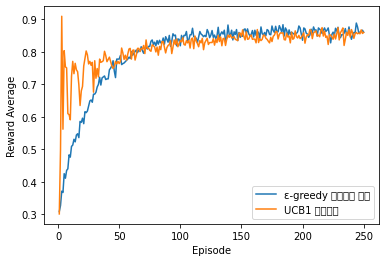

In [41]:
# 게임 시뮬레이터
# 1. Slot 머신의 Arm 3개를 준비한다. 
# 3개의 Arm은 reward(1.0)를 지급하는 확률이 다르다
arms  = [ SlotArm(0.3), SlotArm(0.5), SlotArm(0.9) ]
# 2개의 알고리즘 필요
algos = [ EpsilonGreedyEngine(), UCB1Engine() ] 

# 알고리즘별로 시뮬레이션을 1000번 한다
SIMULATION_COUNT  = 1000
# 1번의 시뮬레이션에서는 250번의 에피소드가 존재한다
EPISODE_COUNT     = 250
for algo in algos:# 알고리즘별로 시뮬레이션
  result  = simulator_play( algo, arms, SIMULATION_COUNT, EPISODE_COUNT)
  df      = pd.DataFrame( {'times':result[0], 'reward':result[1]} )
  tmp     = df.groupby( 'times' ).mean()
  # 시각화(선형 차트)
  plt.plot( tmp, label=algo.getName() )

# 그래프 표시
plt.xlabel('Episode')
plt.ylabel('Reward Average')
plt.legend(loc='best')
plt.show()

In [21]:
result[0].shape, result[1].shape

((250000,), (250000,))

In [27]:
df = pd.DataFrame( {'times':result[0], 'reward':result[1]} )
df.shape

(250000, 2)

In [31]:
# times -> 1~ 250 반복 => 평균 , 1000번에 대한 times가 1일때 리워드평균
# 전체에 다 적용 => (250, 2)
tmp = df.groupby( 'times' ).mean()
tmp.shape

(250, 1)

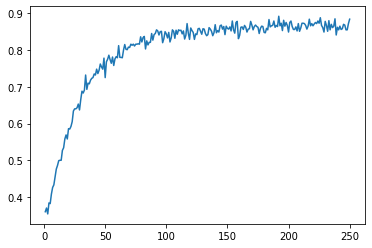

In [36]:
plt.plot( tmp )
plt.show()

In [35]:
tmp.head(1)

,reward
times,
1.0,0.36


In [34]:
tmp.tail(1)

,reward
times,
250.0,0.884


In [28]:
df.head(100)

,times,reward
0,1.0,0.0
1,2.0,1.0
2,3.0,0.0
3,4.0,0.0
4,5.0,0.0
...,...,...
95,96.0,1.0
96,97.0,1.0
97,98.0,1.0
98,99.0,0.0


In [29]:
# 슬롯머신의 arm을 선택하는 횟수가 증가될수록
# 보상을 많이 주는 arm을 선택하는 경향이 보인다
# 보상값이 주로 1인 것을 보면, 보상을 잘주는 팔만 선택한고 있다는 것을 알수이다
df.tail(100)

,times,reward
249900,151.0,1.0
249901,152.0,1.0
249902,153.0,1.0
249903,154.0,1.0
249904,155.0,1.0
...,...,...
249995,246.0,1.0
249996,247.0,0.0
249997,248.0,1.0
249998,249.0,1.0
